In [3]:
## This is used to generate data with different SNR:
"""
W, H: Uniform (0, 1), 
N ∈ R5000×5000 by sampling randomly from N(0,0.01^2),
gen- erate the data matrix using X = WH +N. 
"""
import os
import numpy as np
import matplotlib.pylab as plt
import scipy.io as sio

In [ ]:
data_dir = "../Dataset/syn_dataset/"
os.makedirs(data_dir, exist_ok=True)

snr_db_list = [20, 40, 60, 80, 100]

m, r, n = 5000, 1000, 5000  # X is m x n, W is m x r, H is r x n

for seed, snr_db in enumerate(snr_db_list):
    rng = np.random.default_rng(seed)

    W = rng.uniform(0.0, 1.0, size=(m, r))
    H = rng.uniform(0.0, 1.0, size=(r, n))
    S = W @ H  # clean signal

    # Signal power (mean square)
    Ps = np.mean(S ** 2)

    # Convert target SNR(dB) -> noise power -> noise std
    snr_lin = 10.0 ** (snr_db / 10.0)
    Pn = Ps / snr_lin
    noise_std = np.sqrt(Pn)

    N = rng.normal(0.0, noise_std, size=S.shape)

    X = np.abs(S + N)

    # Verify achieved SNR (should be close to target)
    achieved_snr_db = 10.0 * np.log10(np.mean(S ** 2) / np.mean(N ** 2))

    print(
        f"SNR target={snr_db:3d} dB | achieved={achieved_snr_db:8.3f} dB "
        f"| Ps={Ps:.6e} | noise_std={noise_std:.6e}"
    )

    tmp_res = {"X": X, "W": W, "H": H, "N": N, "snr_db_target": snr_db, "snr_db_achieved": achieved_snr_db}

    base = os.path.join(data_dir, f"syn_snr_{snr_db:03d}dB")
    np.save(base + "_all.npy", tmp_res, allow_pickle=True)
    np.save(base + "_X.npy", X)
    sio.savemat(base + ".mat", {"X": X})

SNR target= 20 dB | achieved=  19.999 dB | Ps=6.251351e+04 | noise_std=2.500270e+01
SNR target= 40 dB | achieved=  40.000 dB | Ps=6.253696e+04 | noise_std=2.500739e+00
SNR target= 60 dB | achieved=  60.001 dB | Ps=6.261014e+04 | noise_std=2.502202e-01
SNR target= 80 dB | achieved=  79.999 dB | Ps=6.253524e+04 | noise_std=2.500705e-02
SNR target=100 dB | achieved= 100.000 dB | Ps=6.254990e+04 | noise_std=2.500998e-03


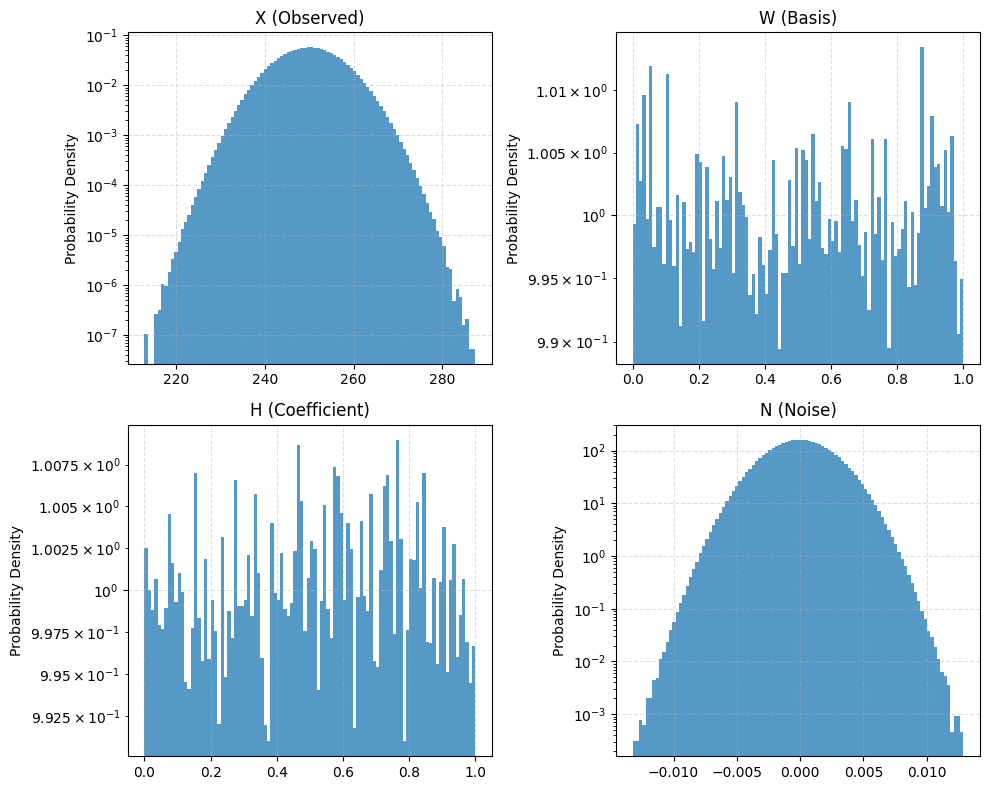

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data_list = [
    (X, "X (Observed)"),
    (W, "W (Basis)"),
    (H, "H (Coefficient)"),
    (N, "N (Noise)")
]

for ax, (data, title) in zip(axes.flatten(), data_list):
    ax.hist(
        data.flatten(),
        bins=100,
        density=True,
        alpha=0.75
    )
    ax.set_title(title)
    ax.set_yscale("log")   # helpful since distributions are heavy-tailed
    ax.set_ylabel("Probability Density")
    ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()